In [15]:
import os, string
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
directory="D:\Trainingsmails_Anonym"
tree=os.listdir(directory)


In [3]:
tree

['Amazon - diverse',
 'Angebote-Werbung-Newsletter',
 'Bestellbest┬Дaetigungen',
 'Kino',
 'Mietwagen',
 'Rechnungen',
 'Reisen',
 'Retoure',
 'Veranstaltungen',
 'Versandbestae┬Дtigung',
 'Zahlungseingang']

In [4]:
for i in os.walk(directory):
    print (i[0])
    print ("has {} folders".format(len(i[1])))
    print ("has {} files".format(len(i[2])))
    print("______")

D:\Trainingsmails_Anonym
has 11 folders
has 0 files
______
D:\Trainingsmails_Anonym\Amazon - diverse
has 0 folders
has 41 files
______
D:\Trainingsmails_Anonym\Angebote-Werbung-Newsletter
has 0 folders
has 305 files
______
D:\Trainingsmails_Anonym\Bestellbest┬Дaetigungen
has 1 folders
has 190 files
______
D:\Trainingsmails_Anonym\Bestellbest┬Дaetigungen\Amazon
has 0 folders
has 138 files
______
D:\Trainingsmails_Anonym\Kino
has 0 folders
has 9 files
______
D:\Trainingsmails_Anonym\Mietwagen
has 0 folders
has 5 files
______
D:\Trainingsmails_Anonym\Rechnungen
has 0 folders
has 128 files
______
D:\Trainingsmails_Anonym\Reisen
has 0 folders
has 73 files
______
D:\Trainingsmails_Anonym\Retoure
has 0 folders
has 6 files
______
D:\Trainingsmails_Anonym\Veranstaltungen
has 0 folders
has 20 files
______
D:\Trainingsmails_Anonym\Versandbestae┬Дtigung
has 4 folders
has 203 files
______
D:\Trainingsmails_Anonym\Versandbestae┬Дtigung\DHL
has 0 folders
has 69 files
______
D:\Trainingsmails_Anonym\V

In [5]:
NEWLINE="\n"

In [6]:
def to_base(directory):
    base=pd.DataFrame(columns=["Text", "Label"])
    for address,_,files in os.walk(directory):
        for file in files:
            if not file.endswith(".eml"):
                continue
            path=os.path.join(address,file)
            
            with open (path, "r", errors='ignore', encoding="utf-8") as f:
                passed_header, lines=False, []
                for line in f:
                    if line.startswith("From:"):
                        lines.append(line.replace("From: ", "").lower())
                    if line.startswith("Subject:"):
                        lines.append(line.replace("Subject: ", "").lower())
                    if passed_header:
                        lines.append(line.lower())
                    elif line==NEWLINE:
                        passed_header=True
            content=NEWLINE.join(lines)            
            label=address.split("\\")[-1]
            row=pd.DataFrame({"Text":[content], "Label": [label]})
            base=base.append(row, ignore_index=True)
    return base
        

In [7]:
data=to_base(directory)

In [8]:
data.head()

,Text,Label
0,"amazon.de <promotion5@amazon.de>\n\n""hund hünd...",Amazon - diverse
1,"amazon.de <promotion5@amazon.de>\n\n""milestone...",Amazon - diverse
2,amazon.de <promotion5@amazon.de>\n\namazon.de ...,Amazon - diverse
3,amazon.de <promotion5@amazon.de>\n\namazon.de ...,Amazon - diverse
4,amazon.de <promotion5@amazon.de>\n\namazon.de ...,Amazon - diverse


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns

In [10]:
X=data["Text"]
y=data["Label"]

In [11]:
d={}
for i in range(0, y.unique().shape[0]):
    d[y.unique()[i]]=i

In [12]:
d

{'Amazon - diverse': 0,
 'Angebote-Werbung-Newsletter': 1,
 'Bestellbest┬Дaetigungen': 2,
 'Amazon': 3,
 'Kino': 4,
 'Mietwagen': 5,
 'Rechnungen': 6,
 'Reisen': 7,
 'Retoure': 8,
 'Veranstaltungen': 9,
 'Versandbestae┬Дtigung': 10,
 'DHL': 11,
 'DPD': 12,
 'GLS': 13,
 'UPS': 14,
 'Zahlungseingang': 15}

In [13]:
y1=y.map(d)
data["Label_coded"]=y1


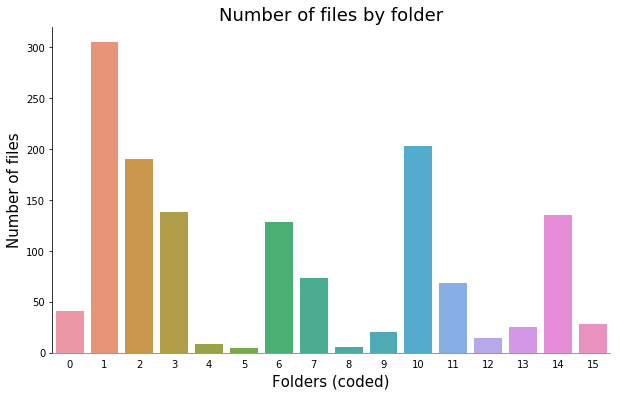

In [16]:
plt.figure(figsize=(10,6))
plt.title("Number of files by folder", fontsize=18)
plt.rcParams['axes.labelsize']="x-large"
sns.countplot(x="Label_coded",  data=data)
plt.xlabel("Folders (coded)", fontsize=15)
plt.ylabel("Number of files", fontsize=15)
plt.tick_params(top='off', bottom='off', left='on', right='off', labelleft='on', labelbottom='on')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color("gray")


In [224]:
Counter(y).items()

dict_items([('Amazon - diverse', 41), ('Angebote-Werbung-Newsletter', 305), ('Bestellbest┬Дaetigungen', 190), ('Amazon', 138), ('Kino', 9), ('Mietwagen', 5), ('Rechnungen', 128), ('Reisen', 73), ('Retoure', 6), ('Veranstaltungen', 20), ('Versandbestae┬Дtigung', 203), ('DHL', 69), ('DPD', 15), ('GLS', 25), ('UPS', 135), ('Zahlungseingang', 28)])

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, cross_val_score, train_test_split
from sklearn import metrics


In [17]:
"""Alir3z4/python-stop-words  https://github.com/Alir3z4/python-stop-words"""
#from stop_words import get_stop_words
#from stop_words import safe_get_stop_words
#stop_words = safe_get_stop_words('unsupported language')
#stop_words = get_stop_words('german')
#print(stop_words[:10])

In [18]:
from nltk.corpus import stopwords
print(stopwords.fileids())

['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish', 'turkish']


In [20]:
from nltk.stem.snowball import SnowballStemmer
from nltk import tokenize, FreqDist
stemmer = SnowballStemmer("german")
X_processed=[]
for row in X:
    words=tokenize.word_tokenize(row)
    for i in range(0, len(words)):
        words[i]=stemmer.stem(words[i])
    X_processed.append(" ".join(words))

In [21]:
stop_words=stopwords.words('german')

In [22]:
vectorizer=CountVectorizer(stop_words=stop_words)

In [23]:
X_vect=vectorizer.fit_transform(i for i in X_processed)

In [24]:
X_vect.shape

(1390, 43504)

In [87]:
vect1=CountVectorizer()
X_v=vect1.fit_transform(X)
X_v.shape

(1390, 49629)

In [25]:

words=tokenize.word_tokenize(X[5])

In [26]:
len(words)

703

In [27]:
freq1=FreqDist(words)

In [28]:
len(freq1.keys())

241

In [29]:
words_stemmed=[stemmer.stem(i) for i in words]


In [30]:
freq2=FreqDist(words_stemmed)
len(freq2.keys())

231

In [31]:
words_clean=[]
for w in words_stemmed:
    if not w in stop_words:
        words_clean.append(w)
freq3=FreqDist(words_clean)
len(freq3)

202

In [32]:
freq3

FreqDist({'›': 30, '.': 26, ':': 26, ',': 25, '&': 23, 'https': 14, 'fur': 12, 'babybett': 12, 'bitt': 8, 'all': 7, ...})

In [33]:
words_nopunkt = [w for w in words_clean if w.isalpha()]
freq4=FreqDist(words_nopunkt)
len(freq4)

142

In [34]:
freq4

FreqDist({'https': 14, 'fur': 12, 'babybett': 12, 'bitt': 8, 'all': 7, 'konn': 6, 'preis': 6, 'babybettausstatt': 5, 'klick': 4, 'nachricht': 4, ...})

In [35]:
import random
random.seed(42)
X_train, X_test, y_train, y_test=train_test_split(X_vect, y1, test_size=0.2, stratify=y1, shuffle=True, random_state=12)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [37]:

lr=LogisticRegression(random_state=12)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=12, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
f1_scorer=metrics.make_scorer(metrics.f1_score, average="weighted" )
cvs=cross_val_score(lr, X_train, y_train, scoring=f1_scorer, 
                    cv=StratifiedShuffleSplit(n_splits=5, test_size=0.2))

In [39]:
cvs.mean()

0.9464018432787284

In [40]:
metrics.accuracy_score(y_test, lr.predict(X_test))

0.9820143884892086

In [41]:
from sklearn.metrics import confusion_matrix
import itertools

In [95]:

cm1=confusion_matrix(lr.predict(X_test), y_test)

In [118]:
def plot_confusion_matrix(cm1, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm1)

    plt.imshow(cm1, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(aspect=5)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm1.max() / 2.
    for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
        plt.text(j, i, format(cm1[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm1[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Confusion matrix, without normalization


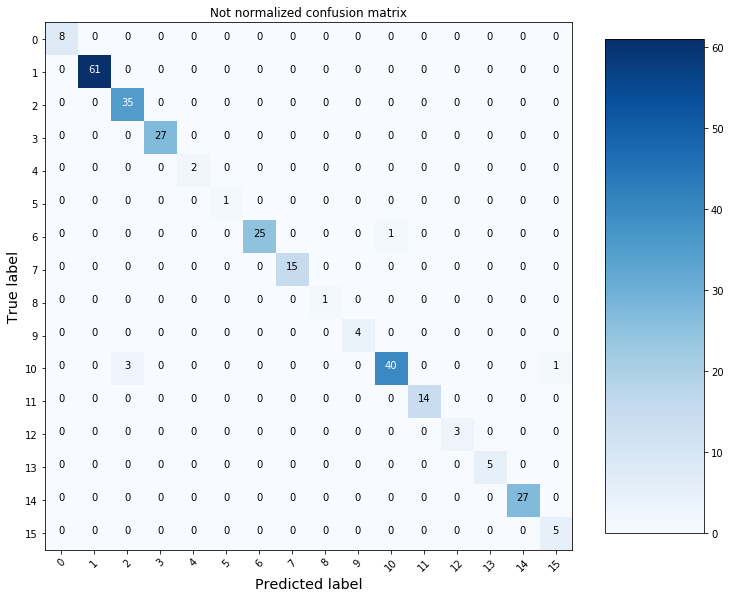

In [126]:
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm1, classes=d.values(), normalize=False,
                      title='Not normalized confusion matrix')

plt.show()

Normalized confusion matrix


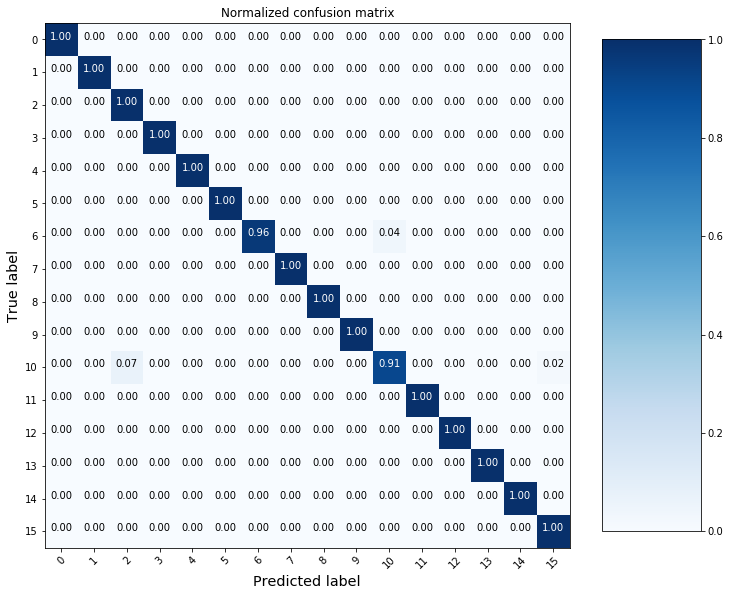

In [125]:
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm1, classes=d.values(), normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

In [47]:
print(classification_report(lr.predict(X_test), y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00        61
          2       0.92      1.00      0.96        35
          3       1.00      1.00      1.00        27
          4       1.00      1.00      1.00         2
          5       1.00      1.00      1.00         1
          6       1.00      0.96      0.98        26
          7       1.00      1.00      1.00        15
          8       1.00      1.00      1.00         1
          9       1.00      1.00      1.00         4
         10       0.98      0.91      0.94        44
         11       1.00      1.00      1.00        14
         12       1.00      1.00      1.00         3
         13       1.00      1.00      1.00         5
         14       1.00      1.00      1.00        27
         15       0.83      1.00      0.91         5

avg / total       0.98      0.98      0.98       278



In [48]:
sm=SMOTE(k_neighbors=3)
X_train_res, y_train_res=sm.fit_sample(X_train, y_train)

In [49]:
lr1=LogisticRegression(random_state=12)
lr1.fit(X_train_res, y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=12, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
Counter(y_train_res).items()

dict_items([(3, 244), (1, 244), (13, 244), (10, 244), (11, 244), (14, 244), (2, 244), (6, 244), (7, 244), (9, 244), (0, 244), (5, 244), (8, 244), (12, 244), (15, 244), (4, 244)])

In [154]:
print(classification_report(lr1.predict(X_test), y_test, digits=3))

             precision    recall  f1-score   support

          0      1.000     1.000     1.000         8
          1      1.000     1.000     1.000        61
          2      0.921     1.000     0.959        35
          3      1.000     1.000     1.000        27
          4      1.000     1.000     1.000         2
          5      1.000     1.000     1.000         1
          6      1.000     0.962     0.980        26
          7      1.000     1.000     1.000        15
          8      1.000     1.000     1.000         1
          9      1.000     1.000     1.000         4
         10      0.976     0.909     0.941        44
         11      1.000     1.000     1.000        14
         12      1.000     1.000     1.000         3
         13      1.000     1.000     1.000         5
         14      1.000     1.000     1.000        27
         15      0.833     1.000     0.909         5

avg / total      0.983     0.982     0.982       278



In [52]:

metrics.accuracy_score(lr1.predict(X_test), np.array(y_test))

0.9820143884892086

In [53]:
cvs1=cross_val_score(lr1, X_train_res, y_train_res, scoring=f1_scorer, 
                    cv=StratifiedShuffleSplit(n_splits=5, test_size=0.2))

In [54]:
cvs1.mean()

0.9915359544199512

In [55]:
from imblearn.over_sampling import ADASYN


In [56]:
adasyn=ADASYN(n_neighbors=3)

In [57]:
X_train_res_a, y_train_res_a=sm.fit_sample(X_train, y_train)
lr2=LogisticRegression(random_state=12)
lr2.fit(X_train_res_a, y_train_res_a)
cvs2=cross_val_score(lr2, X_train_res_a, y_train_res_a, scoring=f1_scorer, 
                    cv=StratifiedShuffleSplit(n_splits=5, test_size=0.2))

In [58]:
cvs2.mean()

0.9932778931415296

In [59]:
print(classification_report(lr2.predict(X_test), y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00        61
          2       0.92      1.00      0.96        35
          3       1.00      1.00      1.00        27
          4       1.00      1.00      1.00         2
          5       1.00      1.00      1.00         1
          6       1.00      0.96      0.98        26
          7       1.00      1.00      1.00        15
          8       1.00      1.00      1.00         1
          9       1.00      1.00      1.00         4
         10       0.98      0.91      0.94        44
         11       1.00      1.00      1.00        14
         12       1.00      1.00      1.00         3
         13       1.00      1.00      1.00         5
         14       1.00      1.00      1.00        27
         15       0.83      1.00      0.91         5

avg / total       0.98      0.98      0.98       278



In [62]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

In [64]:
svd=TruncatedSVD(random_state=12)
truncated_data=svd.fit_transform(X_vect)

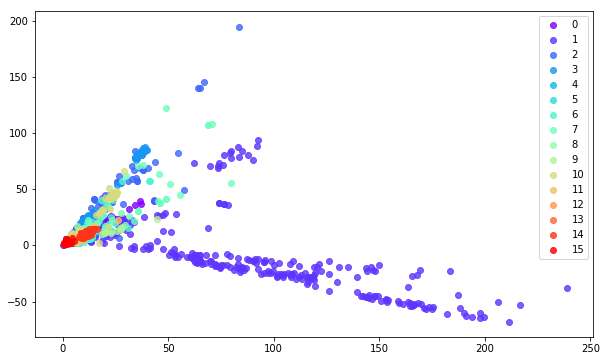

In [76]:

import matplotlib.cm as cm
y_=pd.DataFrame(y1)
plt.figure(figsize=(10,6))
colors = cm.rainbow(np.linspace(0, 1, len(set(y1))))
for yy, c in zip(set(y1), colors):
    plt.scatter(truncated_data[y_[y_.values==yy].index.values, 0], 
                truncated_data[y_[y_.values==yy].index.values, 1], c=c, alpha=0.8, label=str(yy))
plt.legend()

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [80]:
classifiers={RandomForestClassifier(),
             KNeighborsClassifier(),
             SVC(),
             LogisticRegression(),
             MultinomialNB()
             }


In [82]:
random.seed(42)
result=pd.DataFrame(columns=["Classifier",  "F1"])
for clf in classifiers:
    cv=cross_val_score(clf, X_train, y_train, cv=StratifiedShuffleSplit(test_size=0.3), scoring=f1_scorer, n_jobs=-1)
    entry=pd.DataFrame([[clf.__class__.__name__,  cv.mean()]],
                           columns=["Classifier",  "F1"])
   
    result=result.append(entry, ignore_index=True)
result=result.sort_values("F1", ascending=False).reset_index(drop=True)
result

,Classifier,F1
0,LogisticRegression,0.938808
1,RandomForestClassifier,0.885130
2,MultinomialNB,0.792195
3,KNeighborsClassifier,0.790914
4,SVC,0.598817


In [84]:
result_SMOTE=pd.DataFrame(columns=["Classifier",  "F1"])
for clf in classifiers:
    clf.fit(X_train_res, y_train_res)
    entry=pd.DataFrame([[clf.__class__.__name__,  metrics.f1_score(y_test, clf.predict(X_test), average="weighted")]],
                           columns=["Classifier",  "F1"])
   
    result_SMOTE=result_SMOTE.append(entry, ignore_index=True)
result_SMOTE=result_SMOTE.sort_values("F1", ascending=False).reset_index(drop=True)
result_SMOTE

,Classifier,F1
0,LogisticRegression,0.981982
1,RandomForestClassifier,0.927264
2,KNeighborsClassifier,0.899193
3,SVC,0.850679
4,MultinomialNB,0.815583


In [85]:
result_SMOTE=pd.DataFrame(columns=["Classifier",  "F1"])
for clf in classifiers:
    clf.fit(X_train_res, y_train_res)
    entry=pd.DataFrame([[clf.__class__.__name__,  metrics.f1_score(y_test, clf.predict(X_test), average="weighted")]],
                           columns=["Classifier",  "F1"])
   
    result_SMOTE=result_SMOTE.append(entry, ignore_index=True)
result_SMOTE=result_SMOTE.sort_values("F1", ascending=False).reset_index(drop=True)
result_SMOTE

,Classifier,F1
0,LogisticRegression,0.981982
1,RandomForestClassifier,0.929879
2,KNeighborsClassifier,0.899193
3,SVC,0.850679
4,MultinomialNB,0.815583


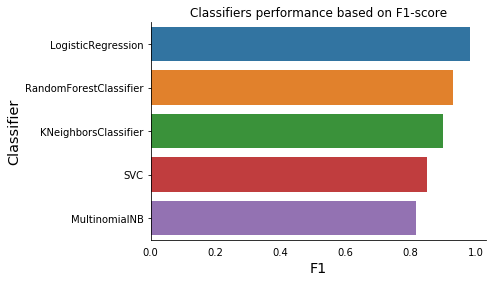

In [93]:
sns.barplot(data=result_SMOTE, y="Classifier", x="F1", orient="h" )
plt.title("Classifiers performance based on F1-score")
plt.tick_params(top='off', bottom='off', left='on', right='off', labelleft='on', labelbottom='on')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color("black")

In [86]:
result_ADASYN=pd.DataFrame(columns=["Classifier",  "F1"])
for clf in classifiers:
    clf.fit(X_train_res_a, y_train_res_a)
    entry=pd.DataFrame([[clf.__class__.__name__,  metrics.f1_score(y_test, clf.predict(X_test), average="weighted")]],
                           columns=["Classifier",  "F1"])
   
    result_ADASYN=result_ADASYN.append(entry, ignore_index=True)
result_ADASYN=result_ADASYN.sort_values("F1", ascending=False).reset_index(drop=True)
result_ADASYN

,Classifier,F1
0,LogisticRegression,0.981982
1,RandomForestClassifier,0.915374
2,KNeighborsClassifier,0.900283
3,SVC,0.864450
4,MultinomialNB,0.816827


In [127]:
type(y_test)

pandas.core.series.Series

In [182]:
for i in range(0, len(y_test1)):
    if y_test1.loc[i][1]!=lr1.predict(X_test[i][:])[0]:
        print("Email number {}, correct {}, predicted {}, number in X {}".format(y_test1.loc[i][0], y_test1.loc[i][1],
                                                                 lr1.predict(X_test[i][:])[0] , i) )

Email number 534, correct 2, predicted 10, number in X 33
Email number 535, correct 2, predicted 10, number in X 86
Email number 527, correct 2, predicted 10, number in X 176
Email number 1101, correct 10, predicted 6, number in X 255
Email number 1385, correct 15, predicted 10, number in X 269


In [188]:
 data.iloc[1385][0]


'zooprofi.de <shop@zooprofi.de>\n\nzooprofi.de - buchhaltung au89582\n\nzooprofi.de - buchhaltung au89582\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nau89582\n\n\n\nsehr geehrter kunde,\n\n\n\nder status ihrer bestellung wurde ge&auml;ndert.\n\n\n\n\n\nneuer status: bezahlt\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nhallo vorname nachname\n\nihr geld ist eingegangen und gebucht worden. \n\ndie ware wird für den versand vorbereitet und\n\nschnellstmöglich versendet.\n\nsie erhalten eine weitere mitteilung, wenn die\n\nware versendet worden ist.\n\n\n\nmfg\n\nbringfried szelag\n\nteam zooprofi\n\n\n\n\n\nbei fragen zu ihrer bestellung antworten sie bitte\n\nauf diese email.\n\n\n\nau89582\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\t\n\n\n\n\tsehr geehrter kunde, \n\n\n\n      \n\n\n\n      der status ihrer bestellung wurde geändert.\n\n \n\n      \n\n\n\nneuer status: \n\nbezahlt\n\n\n\n\n\n\n\n\n\nau89582\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nhallo v

In [179]:
data.iloc[534][2]

2

In [172]:
y_test1.head()

,index,Label
0,827,7
1,1219,13
2,453,2
3,194,1
4,5,0


In [187]:
print(X_test[269][:])

  (0, 13118)	2
  (0, 13517)	5
  (0, 13761)	1
  (0, 15291)	4
  (0, 15513)	2
  (0, 15683)	2
  (0, 16220)	2
  (0, 16324)	2
  (0, 19344)	2
  (0, 19692)	2
  (0, 20076)	2
  (0, 21544)	2
  (0, 21881)	2
  (0, 22105)	1
  (0, 22113)	1
  (0, 22155)	2
  (0, 22190)	2
  (0, 22344)	2
  (0, 23637)	2
  (0, 27220)	2
  (0, 29291)	2
  (0, 29527)	2
  (0, 30225)	2
  (0, 30424)	1
  (0, 30575)	2
  (0, 35430)	2
  (0, 36035)	1
  (0, 37034)	4
  (0, 37692)	2
  (0, 37997)	2
  (0, 40338)	2
  (0, 40450)	4
  (0, 40948)	2
  (0, 41036)	2
  (0, 41606)	2
  (0, 42178)	4
  (0, 42272)	2
  (0, 43086)	6


In [189]:
vectorizer.get_feature_names()[43086]

'zooprofi'

In [192]:
probabilities_10=lr1.coef_[10,:]

array([-3.16e-01,  6.57e-03,  1.45e-02, ..., -2.11e-04,  0.00e+00,
        0.00e+00])

In [210]:
m=pd.DataFrame(lr1.coef_[10,:])
m.T.shape

(1, 43504)

In [217]:
probabilities_10=pd.DataFrame(lr1.coef_[10,:], columns=["Coeffs"])

In [213]:
probabilities_10.shape

(43504, 1)

In [221]:
probabilities_10.head(50).sort_values("Coeffs", ascending=False)

,Coeffs
33,2.432989e-02
24,2.192261e-02
2,1.450575e-02
21,1.406535e-02
39,1.252233e-02
32,1.019385e-02
44,8.109963e-03
1,6.573301e-03
48,5.096926e-03
26,5.013824e-03


(1, 43504)

In [ ]:
vectorizer.vocabulary_.value(423)

In [204]:
inv_map = {v: k for k, v in vectorizer.vocabulary_.items()}

In [205]:
inv_map

{12649: 'amazon',
 33091: 'promotion5',
 24754: 'hund',
 24777: 'hundin',
 24592: 'hos',
 27674: 'laufig',
 27220: 'kund',
 12893: 'angeseh',
 25310: 'interessiert',
 21881: 'fur',
 13364: 'artikel',
 24722: 'https',
 42310: 'www',
 17880: 'de',
 36209: 'sim',
 14211: 'b00e0ivcfa',
 20400: 'europet',
 15163: 'bernina',
 8287: '388',
 8597: '416655',
 35584: 'schutzhosch',
 17126: 'classic',
 9052: '500',
 9461: '590',
 29644: 'mm',
 25179: 'inklusiv',
 24818: 'hygieneeinlag',
 23167: 'gp',
 32989: 'product',
 33890: 'ref',
 19690: 'em_si_text',
 32837: 'preis',
 20376: 'eur',
 9955: '69',
 8596: '416624',
 4555: '240',
 7575: '310',
 14210: 'b00e0itsug',
 10099: '70',
 29119: 'mehr',
 19843: 'entdeck',
 24721: 'http',
 21430: 'footer',
 12652: 'amazonlogo',
 21398: 'folg',
 20586: 'facebook',
 33874: 'redirect',
 24715: 'html',
 35744: 'sef_fb',
 24933: 'ie',
 39780: 'utf8',
 28322: 'location',
 17233: 'com',
 38483: 'token',
 9997: '6bd0fb927cc51e76ff446584b1040f70ea7e88e1',
 26544: '

In [223]:
feature_names = np.asarray(vectorizer.get_feature_names())
for i, label in enumerate(d.keys()):
    top10 = np.argsort(lr.coef_[i])[-10:]
    print("Label:{}. Keywords: {}".format(label, " ".join(feature_names[top10])))

Label:Amazon - diverse. Keywords: artikel haushalt grund angebot luxemburg kindl buch preis amazon erstatt
Label:Angebote-Werbung-Newsletter. Keywords: gp ref android mail apps latam dx 2017 huel newslett
Label:Bestellbest┬Дaetigungen. Keywords: bestell kauf kaufabwickl erfolgreich summ einkauf stadt aufgenomm playstation bestellbestat
Label:Amazon. Keywords: 7624958 8645460 verand websit eur mocht find besuch nordrhein westfal
Label:Kino. Keywords: reservier kart kinopolis reservierungsnumm sitzplatz reserviert kino buchungsbestat platz cineplex
Label:Mietwagen. Keywords: 9812899259 0180 pullach 66 reservier 44 reservierungsanfrag dt 25 sixt
Label:Rechnungen. Keywords: mwst unitymedia adob anbei pdf foodora tomtom 19 nr rechnung
Label:Reisen. Keywords: abicht explorer venere bahn gebucht unterkunft tripadvisor reis hotel buchung
Label:Retoure. Keywords: 5431504 amazon retourensend widerruf retour mytoys rucksend link uber zalando
Label:Veranstaltungen. Keywords: service mitt inkl cent